In [13]:
from transport_sqrb import Transport_SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim

In [14]:
# select parameters and build experiment

n_qubits = 8
seq_lengths = [6, 24]
seq_reps = 10
filename = 'exp_transport_SQRB_example.p'
qubit_length_groups = {
    0: 1,
    1: 1,
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 6,
    7: 6
}

exp = Transport_SQRB_Experiment(n_qubits, seq_lengths, seq_reps, qubit_length_groups, filename=filename)
exp.add_settings()

Having setup our transport SQRB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [5]:
# Setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    p_2q=1e-2,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [6]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [15]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
# qnexus.login()

In [16]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='transport-SQRB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E')

In [17]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [18]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 6, 13, 15, 1, 39, 108457, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 6, 13, 14, 39, 1, 174329, tzinfo=datetime.timezone.utc), running_time=datetime.datetime(2025, 6, 13, 14, 39, 37, 599637, tzinfo=datetime.timezone.utc), cancelled_time=None, error_time=None, queue_position=None)

In [19]:
# retrieve results (once execution job has completed)

exp.retrieve(execute_job_ref)

AttributeError: 'Transport_SQRB_Experiment' object has no attribute 'submit_order'

### Analyze experiment results

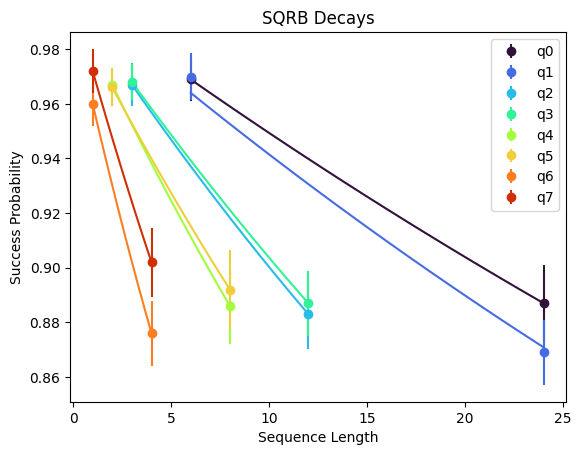

Average Fidelities
------------------------------
qubit 0: 0.994696 +/- 0.000879
qubit 1: 0.993815 +/- 0.000689
qubit 2: 0.989105 +/- 0.001591
qubit 3: 0.989553 +/- 0.001605
qubit 4: 0.984376 +/- 0.002652
qubit 5: 0.985796 +/- 0.002825
qubit 6: 0.967498 +/- 0.004842
qubit 7: 0.973951 +/- 0.004618
------------------------------
Qubit length 1 Average: 0.994255 +/- 0.000559
Qubit length 2 Average: 0.989329 +/- 0.00113
Qubit length 3 Average: 0.985086 +/- 0.001937
Qubit length 6 Average: 0.970725 +/- 0.003346


In [8]:
exp.analyze_results()

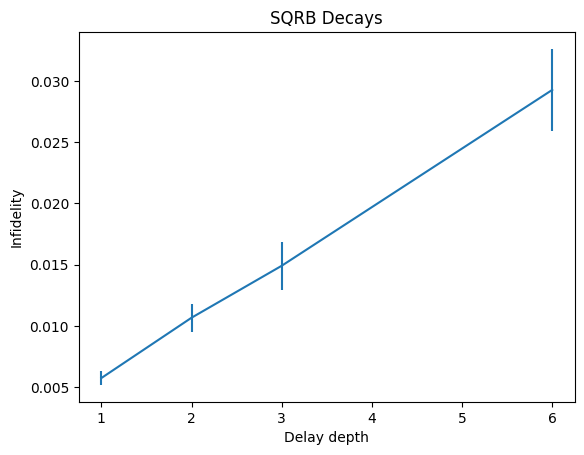

In [9]:
exp.plot_scaling()

In [7]:
# save experiment object to working directory

exp.save()